# DS-SF-34 | Unit Project | 2 | Exploratory Data Analysis | Starter Code

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our modeling exercise in Unit Project 3.

First, load the python libraries you will need for this project:

In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import statsmodels.api as sm
import numpy as np
import scipy
import plotly 
plotly.tools.set_credentials_file(username='Chanator', api_key='x9OeUgtjboRm2o5ckCNJ')
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

Then, read in your dataset:

In [2]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', 'dataset-ucla-admissions.csv'))

df

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
...,...,...,...,...
395,0,620.0,4.00,2.0
396,0,560.0,3.04,3.0
397,0,460.0,2.63,2.0
398,0,700.0,3.65,2.0


## Questions

> ### Question 1.  How many observations are in our dataset?

We have 400 observations where the response variables is Admit and the predictors variables are gre, gpa and prestige.

> ### Question 2.  Create a summary table.

In [3]:

rows = list(df.columns.values)
description = ["0 = Not Adimited, 1 = Admited", "Integer Score of the GRE Test from [220 , 800]", " Grade Point Average from [2.26 , 4]",
              "Integer values from 1 to 4"]
Type = []
missing_values = []
i = 0
for col in df:
    a = df[col].unique()
    if len(a) <= 5:
        Type.append("Categorical")
        str1 = ''.join(str(e) for e in a)
    else:
        Type.append("Continuous")
    if df[col].isnull().sum() == 1:
        missing_values.append("There is " + `df[col].isnull().sum()` + " missing value")
    else:
        missing_values.append("There are " + `df[col].isnull().sum()` + " missing values")
        
columns = ['Variables','Description','Type of Variables','Missing Values']
data_dictionary = pd.DataFrame({'Missing Values' : missing_values, 'Type of Variables' : Type, 'Variables' : rows,
                               'Description' : description})
data_dictionary[columns]

,Variables,Description,Type of Variables,Missing Values
0,admit,"0 = Not Adimited, 1 = Admited",Categorical,There are 0 missing values
1,gre,"Integer Score of the GRE Test from [220 , 800]",Continuous,There are 2 missing values
2,gpa,"Grade Point Average from [2.26 , 4]",Continuous,There are 2 missing values
3,prestige,Integer values from 1 to 4,Categorical,There is 1 missing value


In [4]:
df.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


> ### Question 3.  Why would `gre` have a larger variance than `gpa`?

Because the interval of gre is much wider than the interval from the gpa so that allows the variance to increase as the variables are much likely to be disperse and with higher values.

> ### Question 4.  Drop data points with missing data.

In [5]:
#We eliminate the rows that have nan values
df=df[~np.isnan(df).any(axis=1)]
df

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
...,...,...,...,...
395,0,620.0,4.00,2.0
396,0,560.0,3.04,3.0
397,0,460.0,2.63,2.0
398,0,700.0,3.65,2.0


> ### Question 5.  Confirm that you dropped the correct data.  How can you tell?

In [6]:
Type = []
missing_values = []
i = 0
for col in df:
    a = df[col].unique()
    if len(a) <= 5:
        Type.append("Categorical")
        str1 = ''.join(str(e) for e in a)
    else:
        Type.append("Continuous")
    if df[col].isnull().sum() == 1:
        missing_values.append("There is " + `df[col].isnull().sum()` + " missing value")
    else:
        missing_values.append("There are " + `df[col].isnull().sum()` + " missing values")
        
columns = ['Variables','Description','Type of Variables','Missing Values']
data_dictionary = pd.DataFrame({'Missing Values' : missing_values, 'Type of Variables' : Type, 'Variables' : rows,
                               'Description' : description})
data_dictionary[columns]

,Variables,Description,Type of Variables,Missing Values
0,admit,"0 = Not Adimited, 1 = Admited",Categorical,There are 0 missing values
1,gre,"Integer Score of the GRE Test from [220 , 800]",Continuous,There are 0 missing values
2,gpa,"Grade Point Average from [2.26 , 4]",Continuous,There are 0 missing values
3,prestige,Integer values from 1 to 4,Categorical,There are 0 missing values


Answer: Created a for loop that counts for every column that is present in the dataset the Nan values and fits the result into a directory for the dataset

> ### Question 6.  Create boxplots for `gre` and `gpa`.

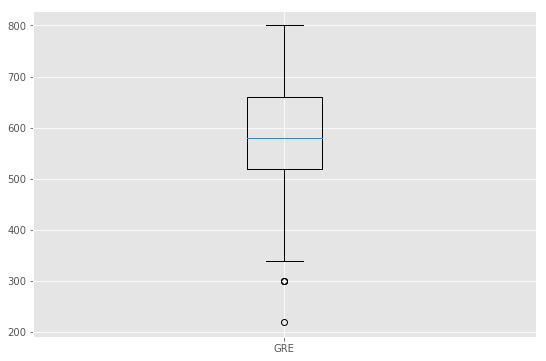

In [7]:
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp_gre = ax.boxplot(df['gre'])
ax.set_xticklabels(['GRE'])

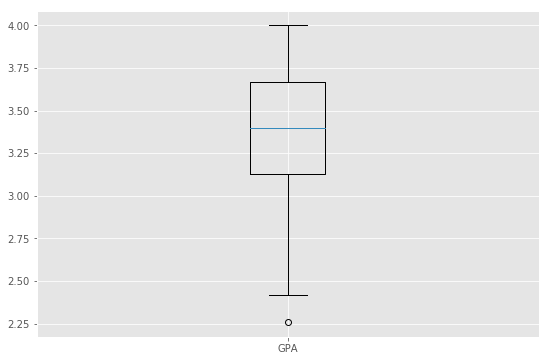

In [8]:
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp_gpa = ax.boxplot(df['gpa'])
ax.set_xticklabels(['GPA'])

> ### Question 7.  What do boxplots show?

Answer: It seems that the median for GRE is approximatly 580 and that 50% of the data are between 520 and 660 also it appears that there could be 2 outliers that need to be checkout. For the GPA it appears that the median is approximatly 3.40 and that 50% of the data are between 3.15 and 3.70.

> ### Question 8.  Plot the distribution of each variable.

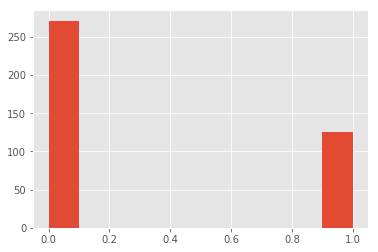

In [9]:
df.admit.hist()

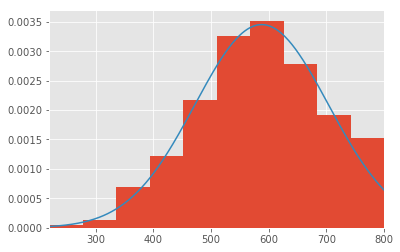

In [10]:
plt.figure(1)
plt.hist(df.gre, normed=True)
plt.xlim((min(df.gre), max(df.gre)))

mean = np.mean(df.gre)
variance = np.var(df.gre)
sigma = np.sqrt(variance)
x = np.linspace(min(df.gre), max(df.gre), len(df.gre))
plt.plot(x, mlab.normpdf(x, mean, sigma))

plt.show()

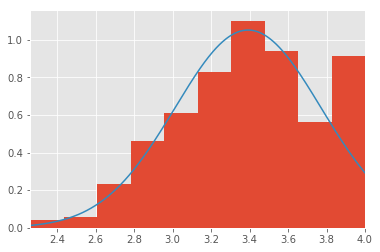

In [11]:
plt.figure(1)
plt.hist(df.gpa, normed=True)
plt.xlim((min(df.gpa), max(df.gpa)))

mean = np.mean(df.gpa)
variance = np.var(df.gpa)
sigma = np.sqrt(variance)
x = np.linspace(min(df.gpa), max(df.gpa), len(df.gpa))
plt.plot(x, mlab.normpdf(x, mean, sigma))

plt.show()

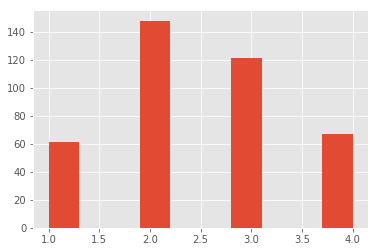

In [12]:
df.prestige.hist()

> ### Question 9.  If our model had an assumption of a normal distribution for `gre` and `gpa`, would we meet that requirement?  Would their distributions need correction?  If so, why, why not?  How?

In [13]:
shapiro_results = scipy.stats.shapiro(df.gre, a=None, reta=False)
matrix_sw = [
    ['', 'DF', 'Test Statistic', 'p-value'],
    ['GRE', len(x) - 1, shapiro_results[0], shapiro_results[1]]
]
shapiro_table = FF.create_table(matrix_sw, index=True)
py.iplot(shapiro_table, filename='shapiro-table')

C:\Users\Fidel\Anaconda2\lib\site-packages\plotly\tools.py:1422: UserWarning:

plotly.tools.FigureFactory.create_table is deprecated. Use plotly.figure_factory.create_table



High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~Chanator/0 or inside your plot.ly account where it is named 'shapiro-table'


In [14]:
shapiro_results = scipy.stats.shapiro(df.gpa, a=None, reta=False)
matrix_sw = [
    ['', 'DF', 'Test Statistic', 'p-value'],
    ['GPA', len(x) - 1, shapiro_results[0], shapiro_results[1]]
]
shapiro_table = FF.create_table(matrix_sw, index=True)
py.iplot(shapiro_table, filename='shapiro-table')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~Chanator/0 or inside your plot.ly account where it is named 'shapiro-table'


Answer: Based on the Shapiro-Wilk test for gre and gpa we cannot reject the hypothesis that the samples comes from a population which has a normal distribution due to the p-value being less than 5%.

> ### Question 10.  Create a correlation matrix for the dataset.

In [16]:
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


> ### Question 11.  What did you find?  Which of our variables are potentially colinear?

Answer: It seems that gre and gpa have a positive correlation so if gre increase it is more likely that gpa increase.

> ### Question 12.  Write an analysis plan for exploring the association between graduate school admission rates and prestige of undergraduate schools.

Answer: 
1. Analysis and undestand what the data means
2. Plot the data to determine the behaviour of the dataset.
3. If its possible do a scatterplot 
4. Determine the correlation between the two dataset.
5. Perform a Hypothesis Test to determine the significant of the dataset.
6. If it fails o reject the null hypothesis, remove the variable from the ecuation.

> ### Question 13.  What is your hypothesis?

Answer: 
The admit will be determine by its gpa, gre and not the prestige of the school.
  So the null hypothesis is that the coefficients of gpa and gre will be cero.
  The alternative hypothesis is that atleast one of the coefficient will be different than cero.